In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import random
import math
import scipy.stats as sp
import scipy
%matplotlib inline 

# Book Code

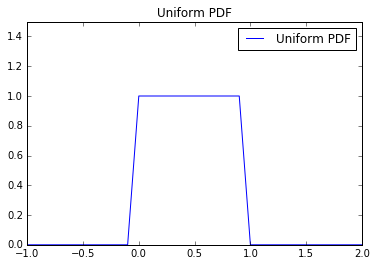

In [3]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

xs = [x / 10.0 for x in range(-40, 40)]
plt.plot(xs,[uniform_pdf(x) for x in xs],'-',label='Uniform PDF')
#plt.plot(xs,[uniform_pdf(x) for x in xs],'--',label='mu=0,sigma=2')
#plt.plot(xs,[uniform_pdf(x) for x in xs],':',label='mu=0,sigma=0.5')
#plt.plot(xs,[uniform_pdf(x) for x in xs],'-.',label='mu=-1,sigma=1')
plt.axis([-1, 2, 0, 1.5])
plt.legend()
plt.title("Uniform PDF")
plt.show()

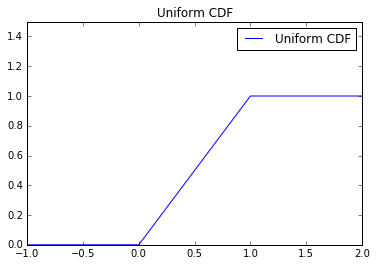

In [4]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

xs = [x / 10.0 for x in range(-40, 40)]
plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label='Uniform CDF')
plt.axis([-1, 2, 0, 1.5])
plt.legend()
plt.title("Uniform CDF")
plt.show()

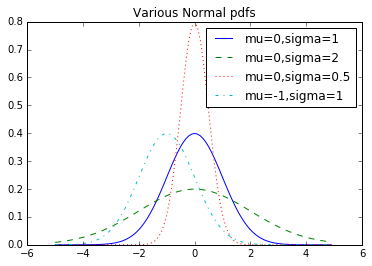

In [5]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

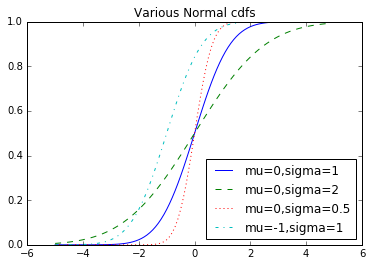

In [6]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

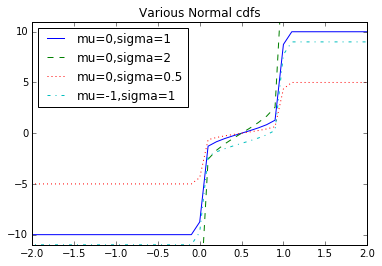

In [7]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[inverse_normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[inverse_normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.axis([-2, 2, -11, 11])
plt.legend(loc=2) # bottom right
plt.title("Various Normal cdfs")
plt.show()

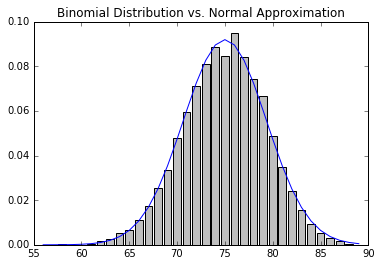

In [8]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = collections.Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
            for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 10000)

# SciPy Code

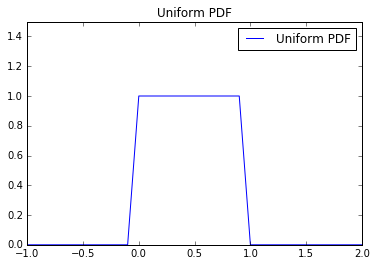

In [9]:
def scipy_uniform_pdf(x):
    return sp.uniform.ppf(x)

xs = [x / 10.0 for x in range(-40, 40)]
plt.plot(xs,[uniform_pdf(x) for x in xs],'-',label='Uniform PDF')
#plt.plot(xs,[uniform_pdf(x) for x in xs],'--',label='mu=0,sigma=2')
#plt.plot(xs,[uniform_pdf(x) for x in xs],':',label='mu=0,sigma=0.5')
#plt.plot(xs,[uniform_pdf(x) for x in xs],'-.',label='mu=-1,sigma=1')
plt.axis([-1, 2, 0, 1.5])
plt.legend()
plt.title("Uniform PDF")
plt.show()

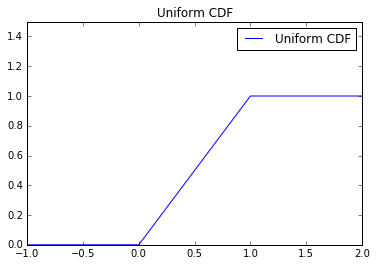

In [10]:
def scipy_uniform_cdf(x):
    return sp.uniform.cdf(x)

xs = [x / 10.0 for x in range(-40, 40)]
plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label='Uniform CDF')
plt.axis([-1, 2, 0, 1.5])
plt.legend()
plt.title("Uniform CDF")
plt.show()

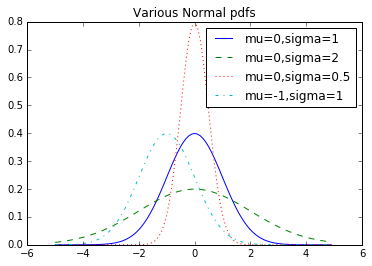

In [11]:
def scipy_normal_pdf(x, mu=0, sigma=1):
    return sp.norm.pdf(x,mu,sigma)

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[scipy_normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[scipy_normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[scipy_normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[scipy_normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

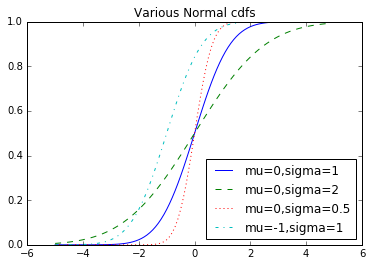

In [12]:
def scipy_normal_cdf(x, mu=0,sigma=1):
    return sp.norm.cdf(x,mu,sigma)
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[scipy_normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[scipy_normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[scipy_normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[scipy_normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

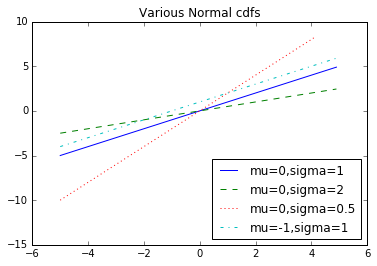

In [17]:
def scipy_inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    return scipy.special.ndtri(sp.norm.cdf(p, mu, sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[scipy_inverse_normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[scipy_inverse_normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[scipy_inverse_normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[scipy_inverse_normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
#plt.axis([-2, 2, -11, 11])
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

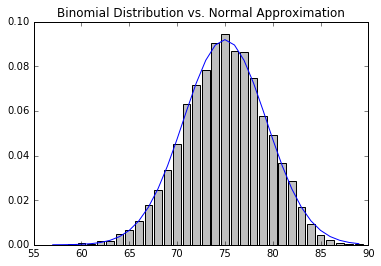

In [14]:
def scipy_binomial(n, p):
    return np.random.binomial(n,p)

def scipy_make_hist(p, n, num_points):
    data = [scipy_binomial(n,p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = collections.Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
            for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
scipy_make_hist(0.75, 100, 10000)